In [1]:
from pandas import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
data=read_csv('titanic.csv')
print(data)

     PassengerId  Survived  Pclass   
0            892         0       3  \
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch   
0                                Kelly, Mr. James    male  34.5      0      0  \
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
new_data=data.dropna()
print(new_data.to_string())

     PassengerId  Survived  Pclass                                                             Name     Sex   Age  SibSp  Parch         Ticket      Fare            Cabin Embarked
12           904         1       1                    Snyder, Mrs. John Pillsbury (Nelle Stevenson)  female  23.0      1      0          21228   82.2667              B45        S
14           906         1       1          Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)  female  47.0      1      0    W.E.P. 5734   61.1750              E31        S
24           916         1       1                  Ryerson, Mrs. Arthur Larned (Emily Maria Borie)  female  48.0      1      3       PC 17608  262.3750  B57 B59 B63 B66        C
26           918         1       1                                     Ostby, Miss. Helene Ragnhild  female  22.0      0      1         113509   61.9792              B36        C
28           920         0       1                                          Brady, Mr. John Bertram    ma

In [8]:
new_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,1102.712644,0.505747,1.137931,39.247126,0.597701,0.482759,98.109198
std,126.751901,0.502865,0.435954,15.218730,0.637214,0.860801,88.177319
min,904.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,986.000000,0.000000,1.000000,27.000000,0.000000,0.000000,35.339600
50%,1094.000000,1.000000,1.000000,39.000000,1.000000,0.000000,71.283300
75%,1216.000000,1.000000,1.000000,50.000000,1.000000,1.000000,135.066650
max,1306.000000,1.000000,3.000000,76.000000,3.000000,4.000000,512.329200


In [9]:
# print(new_data.corr())

In [10]:
data['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [11]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

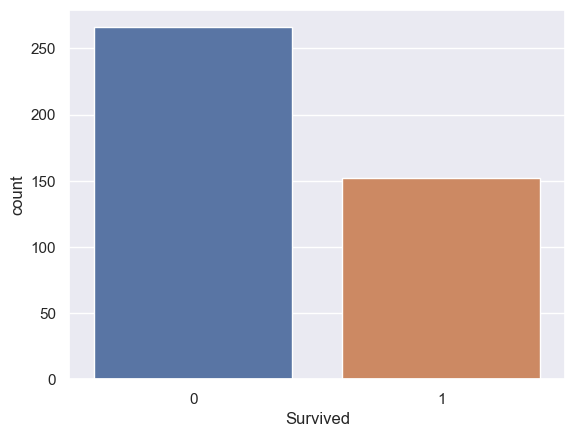

In [12]:
sns.countplot(x='Survived',data=data)

<Axes: xlabel='Survived', ylabel='count'>

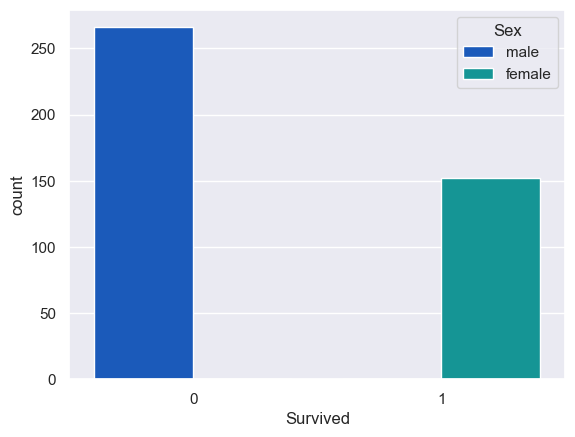

In [13]:
sns.countplot(x='Survived',hue='Sex',data=data,palette='winter')

<Axes: xlabel='Survived', ylabel='count'>

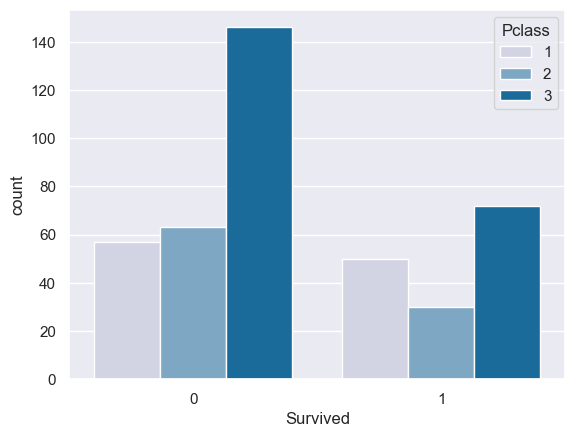

In [14]:
sns.countplot(x='Survived',hue='Pclass',data=data,palette='PuBu')

<Axes: ylabel='Frequency'>

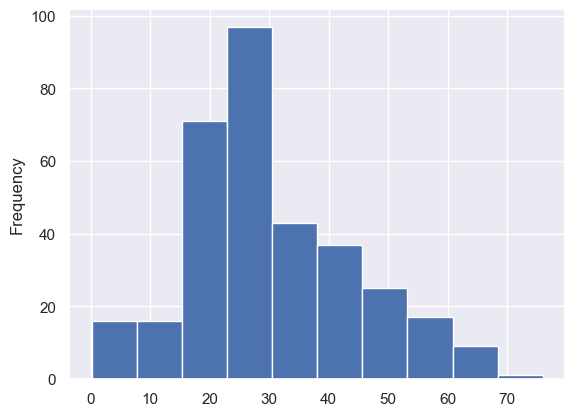

In [15]:
data['Age'].plot.hist()

<Axes: ylabel='Frequency'>

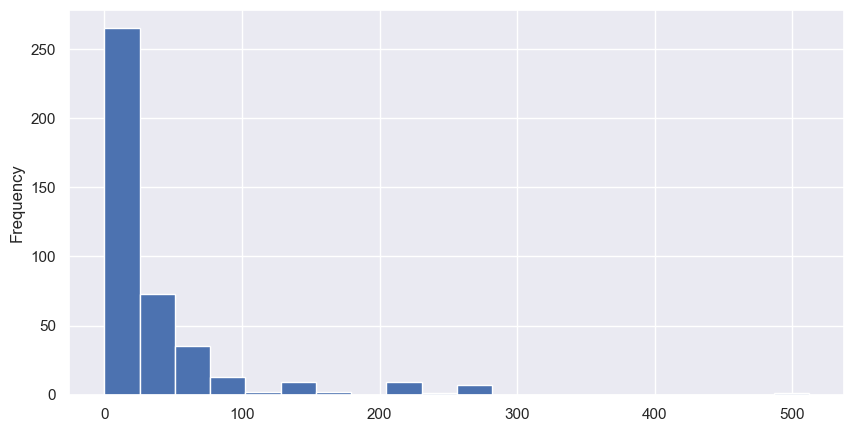

In [16]:
data['Fare'].plot.hist(bins=20, figsize=(10,5))

<Axes: xlabel='SibSp', ylabel='count'>

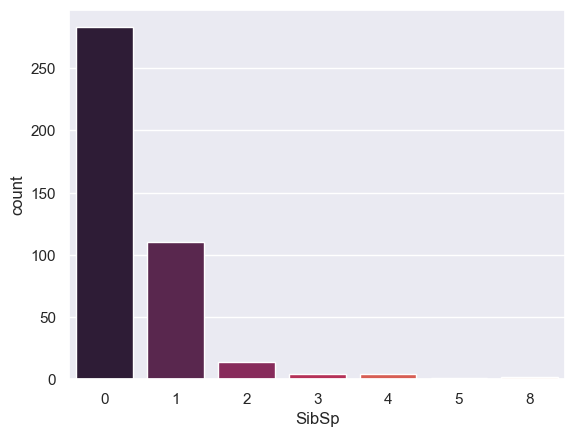

In [17]:
sns.countplot(x='SibSp', data=data, palette='rocket')

<Axes: ylabel='Frequency'>

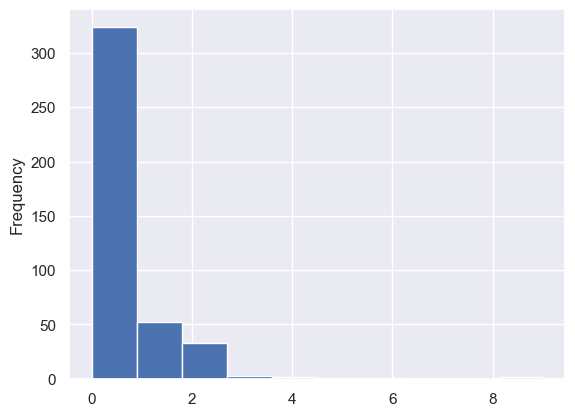

In [18]:
data['Parch'].plot.hist()

In [19]:
# sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)

In [21]:
new_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace = True)

C:\Users\Varun Sampat\AppData\Local\Temp\ipykernel_14668\2124237741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace = True)


In [22]:
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",1,23.0,1,0,21228,82.2667,B45,0
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",1,47.0,1,0,W.E.P. 5734,61.1750,E31,0
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",1,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,1
26,918,1,1,"Ostby, Miss. Helene Ragnhild",1,22.0,0,1,113509,61.9792,B36,1
28,920,0,1,"Brady, Mr. John Bertram",0,41.0,0,0,113054,30.5000,A21,0


In [23]:
X=new_data.drop(columns=['PassengerId','Name','Ticket','Survived','Cabin'],axis=1)
Y=new_data['Survived']

In [24]:
print(X)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
12        1    1  23.0      1      0   82.2667         0
14        1    1  47.0      1      0   61.1750         0
24        1    1  48.0      1      3  262.3750         1
26        1    1  22.0      0      1   61.9792         1
28        1    0  41.0      0      0   30.5000         0
..      ...  ...   ...    ...    ...       ...       ...
404       1    0  43.0      1      0   27.7208         1
405       2    0  20.0      0      0   13.8625         1
407       1    0  50.0      1      1  211.5000         1
411       1    1  37.0      1      0   90.0000         2
414       1    1  39.0      0      0  108.9000         1

[87 rows x 7 columns]


In [25]:
print(Y)

12     1
14     1
24     1
26     1
28     0
      ..
404    0
405    0
407    0
411    1
414    1
Name: Survived, Length: 87, dtype: int64


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(87, 7) (69, 7) (18, 7)


In [28]:
model=LogisticRegression()

In [29]:
model.fit(X_train, Y_train)

c:\Users\Varun Sampat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
X_train_predict = model.predict(X_train)
print(X_train_predict)

[1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0
 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1]


In [31]:
training_data_accuracy=accuracy_score(Y_train, X_train_predict)
print('Accuracy score of trainig data:',training_data_accuracy )

Accuracy score of trainig data: 1.0


In [32]:
X_test_predict=model.predict(X_test)
print(X_test_predict)

[1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1]


In [33]:
test_data_accuracy=accuracy_score(Y_test, X_test_predict)
print('Accuracy score of test data:',test_data_accuracy )

Accuracy score of test data: 1.0


In [34]:
print(confusion_matrix(Y_train,X_train_predict))

[[34  0]
 [ 0 35]]


In [35]:
print(classification_report(Y_train,X_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        35

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

